In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import gkey
import gmaps

gmaps.configure(api_key=gkey)

In [34]:
farm_markets_clean = pd.read_csv("../CleanFM.csv", index_col=0)
farm_markets_clean.head()

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,updateTime,Region,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Yelp Results,Yelp Price,Yelp Rating
0,Caledonia Farmers Market Association - Danville,Danville,Caledonia,Vermont,05828,06/14/2017 to 08/30/2017,Wed: 9:00 AM-1:00 PM;,09/06/2017 to 10/18/2017,Wed: 2:00 PM-6:00 PM;,NaN,...,6/20/2017 10:43:57 PM,Northeast,51.2,2011.0,186.0,52292.0,29717.0,NaN,NaN,NaN
1,Barre Farmers Market,Barre,Washington,Vermont,05641,05/31/2017 to 10/04/2017,Wed: 4:00 PM-7:30 PM;,NaN,NaN,NaN,...,7/4/2017 10:33:01 AM,Northeast,42.6,17298.0,1848.0,49077.0,27985.0,NaN,NaN,NaN
2,Bethel Farmers Market,Bethel,Windsor,Vermont,05089,NaN,NaN,NaN,NaN,NaN,...,2009,Northeast,46.2,4974.0,565.0,46097.0,27084.0,NaN,NaN,NaN
3,Bradford Farmers Market,Bradford,Orange,Vermont,05033,05/18/2014 to 10/19/2014,Sun: 10:00 AM-2:00 PM;,NaN,NaN,NaN,...,4/9/2014 10:03:26 AM,Northeast,40.3,2729.0,547.0,43021.0,23173.0,NaN,NaN,NaN
4,Brandon Farmers Market,Brandon,Rutland,Vermont,05733,05/22/2015 to 10/09/2015,Fri: 9:00 AM-2:00 PM;,NaN,NaN,NaN,...,4/23/2015 3:34:19 PM,Northeast,47.7,5799.0,580.0,53504.0,26931.0,NaN,NaN,NaN


In [24]:
# Heatmap of all farmers markets across the US, using gmaps

locations = farm_markets_clean[["Latitude","Longitude"]].astype(float)
fig = gmaps.figure(map_type='HYBRID')
heat_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
# Group by region

df_region = farm_markets_clean.groupby(['Region']).count()

df_region.head()

,Unnamed: 0,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,...,WildHarvested,updateTime,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Yelp Results,Yelp Price,Yelp Rating
Region,,,,,,,,,,,,,,,,,,,,,
Central,1478,1478,1478,1393,1478,1478,951,998,71,70,...,1478,1478,1452,1455,1455,1450,1452,199,153,199
East North Central,1072,1072,1072,1034,1072,1072,678,691,63,60,...,1072,1072,1065,1065,1065,1064,1065,120,95,120
Northeast,2128,2128,2119,2023,2128,2128,1404,1438,89,89,...,2128,2128,2087,2088,2088,2084,2087,344,276,344
Northwest,401,401,401,378,401,401,290,294,19,19,...,401,401,387,387,387,386,387,107,95,107
South,686,686,685,640,686,686,401,418,39,38,...,686,686,666,666,666,665,665,77,64,77


In [10]:
df_region = df_region.reset_index()
df_region.head()

,Region,Unnamed: 0,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,...,WildHarvested,updateTime,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Yelp Results,Yelp Price,Yelp Rating
0,Central,1478,1478,1478,1393,1478,1478,951,998,71,...,1478,1478,1452,1455,1455,1450,1452,199,153,199
1,East North Central,1072,1072,1072,1034,1072,1072,678,691,63,...,1072,1072,1065,1065,1065,1064,1065,120,95,120
2,Northeast,2128,2128,2119,2023,2128,2128,1404,1438,89,...,2128,2128,2087,2088,2088,2084,2087,344,276,344
3,Northwest,401,401,401,378,401,401,290,294,19,...,401,401,387,387,387,386,387,107,95,107
4,South,686,686,685,640,686,686,401,418,39,...,686,686,666,666,666,665,665,77,64,77


/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


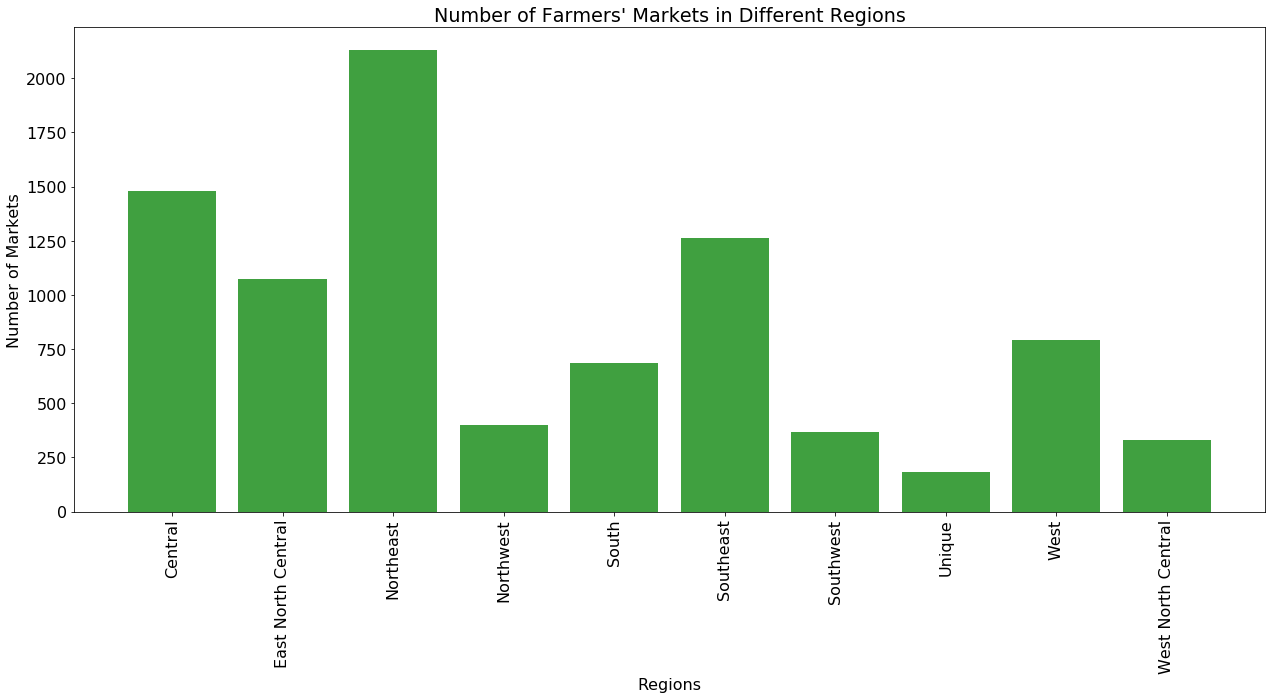

In [23]:
x_axis = df_region['Region']
y_axis = df_region['MarketName']

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

plt.figure(figsize=(18,10))
plt.bar(x_axis, y_axis, color='g', alpha=0.75, align="center")
plt.title("Number of Farmers' Markets in Different Regions")
plt.xticks(x_axis, rotation="vertical")
plt.xlabel("Regions")
plt.ylabel("Number of Markets")
plt.tight_layout()
plt.savefig("../Graphs/MarketsByRegion.png")
plt.show()

In [35]:
# Group by income

bins = [0, 40000, 70000, 500000]

# Create the names for the bins
group_names = ["Low Income", "Medium Income", "High Income"]

farm_markets_clean["Income Group"] = pd.cut(farm_markets_clean["Household Income"], bins, labels=group_names)

In [36]:
# Get the average income for each zip code

income_byzip = farm_markets_clean.groupby(["zip"])["Household Income"].mean().reset_index(name="income")
income_byzip = income_byzip.set_index("zip")
income_byzip1 = income_byzip["income"]
income_byzip.head(5)

,income
zip,
00000,NaN
00601,12041.0
00603,15485.0
00606,15019.0
00610,16707.0


In [37]:
# Get the number of markets in each zip code

marketcount_byzip = farm_markets_clean.groupby(["zip"])["MarketName"].count().reset_index(name="market_count")
marketcount_byzip = marketcount_byzip.set_index("zip")
marketcount1 = marketcount_byzip["market_count"]
marketcount_byzip.head(5)

,market_count
zip,
00000,1
00601,2
00603,1
00606,1
00610,1


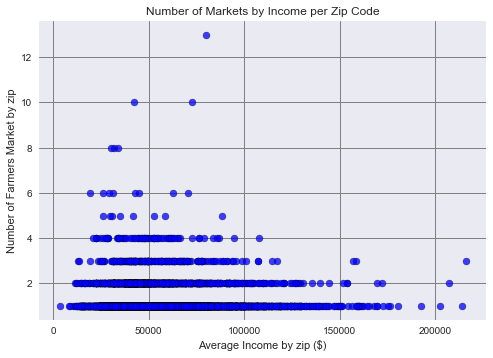

In [62]:
# Create plot

# plt.style.use('seaborn')
plt.scatter(income_byzip1, marketcount1, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75,label="MarketbyIncome")
# Place a legend on the chart in what matplotlib believes to be the "best" location 'bmh'
#plt.legend(loc="best",title="City Type")

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

plt.title("Number of Markets by Income per Zip Code")
plt.xlabel("Average Income by zip ($)")
plt.ylabel("Number of Farmers Market by zip")

plt.grid(b=None,which='major',axis='both',color='grey')

plt.savefig("../Graphs/MarketByIncome.png")
# Print our chart to the screen
plt.show()

In [43]:
population_byzip = farm_markets_clean.groupby(["zip"])["Population"].sum()
population_byzip_df = pd.DataFrame(population_byzip)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


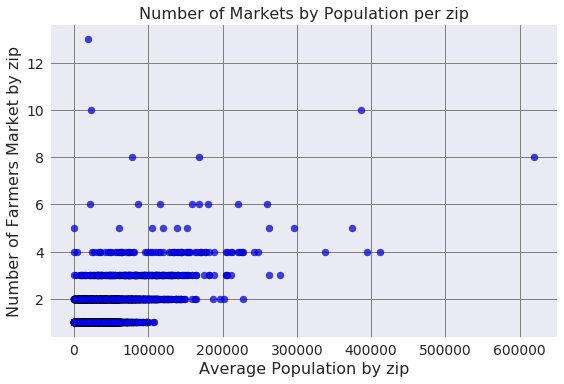

In [99]:
# plt.style.use('seaborn')
plt.scatter(population_byzip, marketcount1, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75,label="MarketbyPopulation")
# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc="best",title="City Type")

plt.title("Number of Markets by Population per zip", fontsize=16)
plt.xlabel("Average Population by zip", fontsize=16)
plt.ylabel("Number of Farmers Market by zip", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(b=None,which='major',axis='both',color='grey')

# Print our chart to the screen
plt.tight_layout()
plt.savefig("../Graphs/MarketByPopulation.png")
plt.show()

In [46]:
market_byincome = farm_markets_clean.groupby(["Income Group"])["MarketName"].count()
market_byincome_df = pd.DataFrame(market_byincome)

In [47]:
market_byincome_df

,MarketName
Income Group,
Low Income,2188
Medium Income,4539
High Income,1726


In [48]:
farm_markets_clean["Organic"] = farm_markets_clean["Organic"].replace(r'-', 'Z', regex=True)

In [69]:
income_stats = pd.DataFrame(farm_markets_clean["Household Income"].describe())
income_stats

,Household Income
count,8453.000000
mean,54949.009582
std,23265.605622
min,3404.000000
25%,39660.000000
50%,49466.000000
75%,65287.000000
max,216037.000000


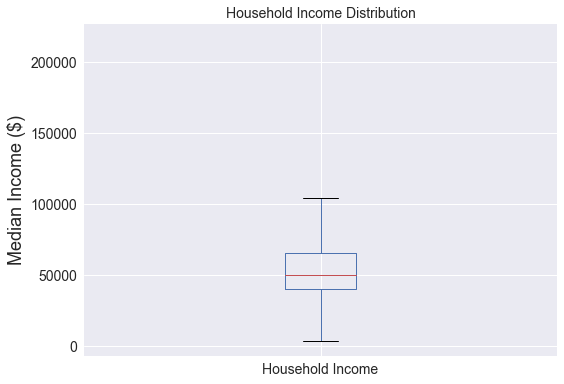

In [89]:
farm_markets_clean.boxplot("Household Income", fontsize=14)
plt.title("Household Income Distribution", fontsize=14)
plt.ylabel("Median Income ($)", fontsize=18)
plt.tight_layout()
plt.savefig('../Graphs/HouseholdIncomeStats.png')
plt.show()

In [51]:
market_by_income_df2 = farm_markets_clean.groupby(["Income Group","Organic"])["MarketName"].count().reset_index(name="market_count")
market_by_income_df2

,Income Group,Organic,market_count
0,Low Income,N,409
1,Low Income,Y,465
2,Low Income,Z,1314
3,Medium Income,N,646
4,Medium Income,Y,1167
5,Medium Income,Z,2726
6,High Income,N,232
7,High Income,Y,667
8,High Income,Z,827


In [52]:
market_by_income_df3 = market_by_income_df2.loc[market_by_income_df2["Organic"]=="Y"]
organic_group = market_by_income_df3["market_count"]
#organic_group

market_by_income_df4 = market_by_income_df2.loc[market_by_income_df2["Organic"]=="N"]
nonorganic_group = market_by_income_df4["market_count"]
#nonorganic_group

market_by_income_df5 = market_by_income_df2.loc[market_by_income_df2["Organic"]=="Z"]
unknown_group = market_by_income_df5["market_count"]
#unknown_group

In [54]:
# set width of bar
barWidth = 0.25

# set height of bar
market1 = [x1 for x1 in nonorganic_group]
market2 = [x2 for x2 in organic_group]
market3 = [x3 for x3 in unknown_group]

# Set position of bar on X axis
r1 = np.arange(len(market1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


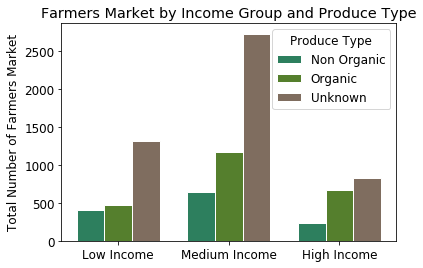

In [56]:
group = market_by_income_df2["Income Group"].unique()

#plt.legend(loc="best",title="group")
# Make the plot
plt.bar(r1, market1, color='#2d7f5e', width=barWidth, edgecolor='white', label='Non Organic')
plt.bar(r2, market2, color='#557f2d', width=barWidth, edgecolor='white', label='Organic')
plt.bar(r3, market3, color='#7f6d5f', width=barWidth, edgecolor='white', label='Unknown')

#plt.xlabel('Income group', fontweight='bold')
plt.legend(loc="best",title="Produce Type")

plt.title("Farmers Market by Income Group and Produce Type")
plt.ylabel("Total Number of Farmers Market")
plt.xticks([r + barWidth for r in range(len(market1))], ['Low Income', 'Medium Income', 'High Income'])
# Print our chart to the screen 

plt.tight_layout()
plt.savefig("MarketByIncomeAndProduceType.png")
plt.show()

In [65]:
# Create dataframe with subset of data with valid Yelp ratings

yelp_subset = farm_markets_clean[(farm_markets_clean["Yelp Rating"].isnull() == False) & 
                                (farm_markets_clean["Yelp Results"] != "NOT EQUAL")]

good_markets = yelp_subset[yelp_subset["Yelp Rating"] >= 4.5]
good_markets.head()

,MarketName,city,County,State,zip,Season1Date,Season1Time,Season2Date,Season2Time,Season3Date,...,Region,Median Age,Population,Poverty Count,Household Income,Per Capita Income,Yelp Results,Yelp Price,Yelp Rating,Income Group
8,Bristol Farmers' Market,Bristol,Addison,Vermont,05443,NaN,Wed: 3:00 PM-6:00 PM;Sat: 10:00 AM-1:00 PM;,NaN,NaN,NaN,...,Northeast,45.5,6467.0,579.0,59963.0,27723.0,"{'id': 'RPdn9BpxhkNsL3185YxA6g', 'alias': 'bri...",NaN,5.0,Medium Income
9,Burlington Farmers Market,Burlington,Chittenden,Vermont,05401,05/07/2016 to 10/29/2016,Sat: 8:30 AM-2:00 PM;,NaN,NaN,NaN,...,Northeast,27.5,27908.0,8189.0,36348.0,26259.0,"{'id': '1W8LiavS5om4adukAhg4eQ', 'alias': 'bur...",$$,4.5,Low Income
30,Hardwick Farmers' Market,Hardwick,Caledonia,Vermont,05843,05/20/2016 to,Fri: 3:00 PM-6:00 PM;,NaN,NaN,NaN,...,Northeast,39.0,2636.0,435.0,42143.0,22430.0,"{'id': '3b_djzV0Fbr3pOYDdVyfcw', 'alias': 'har...",$,4.5,Medium Income
67,Shelburne Farmers Market,Shelburnwe,Chittenden,Vermont,05482,05/27/2017 to 10/14/2017,Sat: 9:00 AM-1:00 PM;,NaN,NaN,NaN,...,Northeast,46.1,7387.0,285.0,94196.0,51295.0,"{'id': 'HYEk8Xxwo_J6jIK3r8H-2A', 'alias': 'she...",$$,5.0,High Income
76,Vermont Farmers Market,Rutland,Rutland,Vermont,05701,05/12/2018 to 10/27/2018,Wed: 3:00 PM-6:00 PM;Sat: 9:00 AM-2:00 PM;,NaN,NaN,NaN,...,Northeast,44.7,20361.0,2703.0,42981.0,25459.0,"{'id': 'PyKhxtf6GezZdcZDAsVqPQ', 'alias': 'ver...",$,4.5,Medium Income


In [66]:
locations = good_markets[["Latitude","Longitude"]]

fig = gmaps.figure(map_type="HYBRID")
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [67]:
good_markets_incomegroup = good_markets.groupby("Income Group").count()
good_markets_incomegroup["MarketName"]

Income Group
Low Income       111
Medium Income    295
High Income      170
Name: MarketName, dtype: int64

In [68]:
good_markets_regiongroup = good_markets.groupby("Region").count()
regiongroup = farm_markets_clean.groupby("Region").count()
good_markets_regiongroup["MarketName"] / regiongroup["MarketName"] * 100

Region
Central                6.901218
East North Central     4.850746
Northeast              7.048872
Northwest             12.718204
South                  5.102041
Southeast              8.306962
Southwest              6.504065
Unique                 5.524862
West                   7.187894
West North Central     1.823708
Name: MarketName, dtype: float64

In [100]:
# Create plot for market count by each payment type and income type

farm_markets_credit = farm_markets_clean.loc[farm_markets_clean["Credit"] =='Y']
market_by_income_df2 = farm_markets_credit.groupby(["Income Group","Credit"])["MarketName"].count().reset_index(name="market_count")
credit_group = market_by_income_df2["market_count"]
market_by_income_df2

,Income Group,Credit,market_count
0,Low Income,Y,1238
1,Medium Income,Y,2586
2,High Income,Y,1174


In [102]:
farm_markets_wic = farm_markets_clean.loc[farm_markets_clean["WIC"] =='Y']
market_by_income_df2 = farm_markets_wic.groupby(["Income Group","WIC"])["MarketName"].count().reset_index(name="market_count")
wic_group = market_by_income_df2["market_count"]
market_by_income_df2

,Income Group,WIC,market_count
0,Low Income,Y,649
1,Medium Income,Y,1372
2,High Income,Y,599


In [103]:
farm_markets_snap = farm_markets_clean.loc[farm_markets_clean["SNAP"] =='Y']
market_by_income_df2 = farm_markets_snap.groupby(["Income Group","SNAP"])["MarketName"].count().reset_index(name="market_count")
snap_group = market_by_income_df2["market_count"]
market_by_income_df2

,Income Group,SNAP,market_count
0,Low Income,Y,809
1,Medium Income,Y,1438
2,High Income,Y,568


In [104]:
farm_markets_sfmnp = farm_markets_clean.loc[farm_markets_clean["SFMNP"] =='Y']
market_by_income_df2 = farm_markets_sfmnp.groupby(["Income Group","SFMNP"])["MarketName"].count().reset_index(name="market_count")
sfmnp_group = market_by_income_df2["market_count"]
market_by_income_df2

,Income Group,SFMNP,market_count
0,Low Income,Y,764
1,Medium Income,Y,1412
2,High Income,Y,564


In [106]:
farm_markets_wiccash = farm_markets_clean.loc[farm_markets_clean["WICcash"] =='Y']
market_by_income_df2 = farm_markets_wiccash.groupby(["Income Group","WICcash"])["MarketName"].count().reset_index(name="market_count")
WICcash_group = market_by_income_df2["market_count"]
market_by_income_df2

,Income Group,WICcash,market_count
0,Low Income,Y,365
1,Medium Income,Y,663
2,High Income,Y,270


In [107]:
# set width of bar
barWidth = 0.15

# set height of bar
market1 = [x1 for x1 in credit_group]
market2 = [x2 for x2 in wic_group]
market3 = [x3 for x3 in sfmnp_group]
market4 = [x4 for x4 in WICcash_group]
market5 = [x5 for x5 in snap_group]

# Set position of bar on X axis
r1 = np.arange(len(market1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

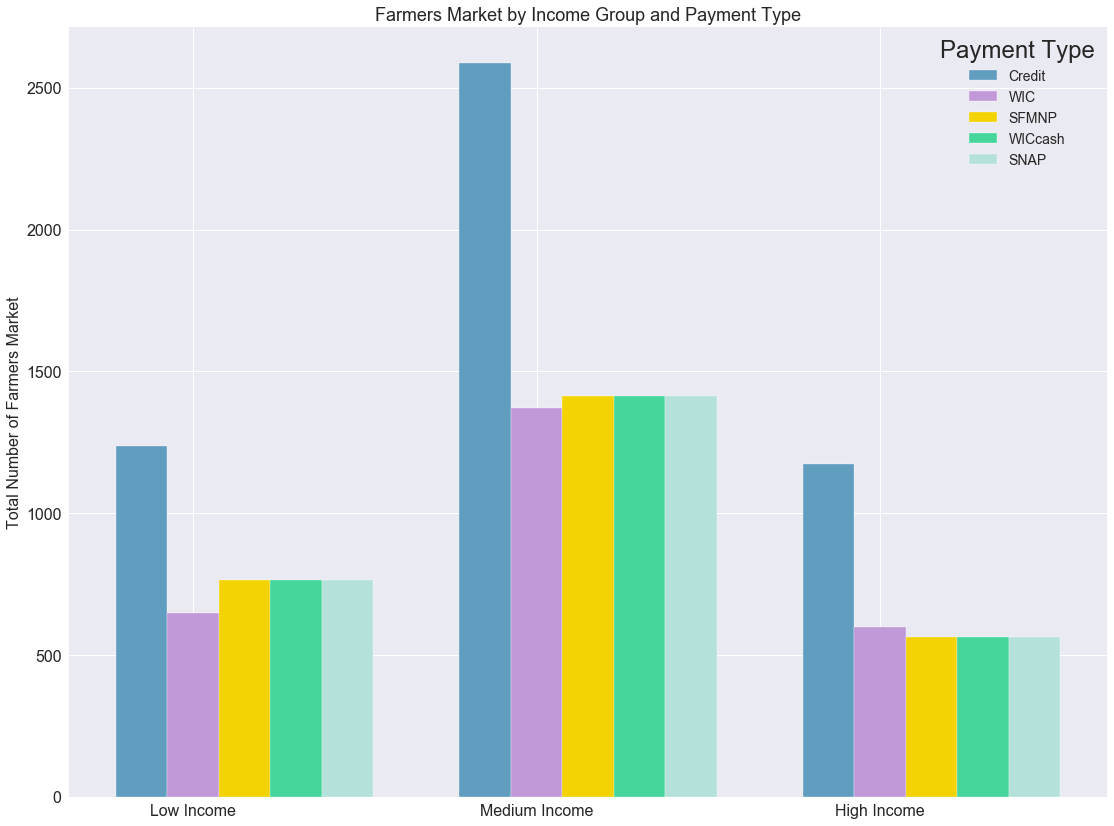

In [114]:
group = farm_markets_clean["Income Group"].unique()

plt.figure(figsize =(16,12))

# Make the plot
plt.bar(r1, market1, color='#619dbf', width=barWidth, edgecolor='white', label='Credit')
plt.bar(r2, market2, color='#c199d9', width=barWidth, edgecolor='white', label='WIC')
plt.bar(r3, market3, color='#f4d305', width=barWidth, edgecolor='white', label='SFMNP')
plt.bar(r4, market3, color='#44d69b', width=barWidth, edgecolor='white', label='WICcash')
plt.bar(r5, market3, color='#b5e1db', width=barWidth, edgecolor='white', label='SNAP')

#plt.xlabel('Income group', fontweight='bold')
plt.legend(loc="best",title="Payment Type", fontsize=14)

plt.title("Farmers Market by Income Group and Payment Type",fontsize=18)
plt.ylabel("Total Number of Farmers Market", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks([r + barWidth for r in range(len(market1))], ['Low Income', 'Medium Income', 'High Income'],
          fontsize=16)

# Print our chart to the screen 
plt.tight_layout()
plt.savefig("MarketByIncomeAndPaymentType.png")
plt.show()